<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [68]:
# Tensorflow is a deep learning framework developed by google
# Keras is library based on tensorflow and some other deep learning frameworks

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

In [69]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [11]:
X_train[0].shape

(28, 28)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

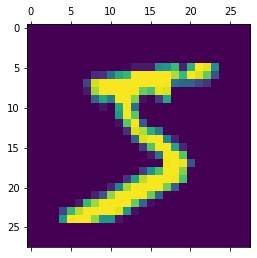

In [13]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [14]:
# Scaling the data
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

In [20]:
# first argument of reshape function is the (data you want to reshape) and second one is the (new shape you want)
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [19]:
X_train_flattened.shape

(60000, 784)

In [22]:
X_train_flattened[0].shape

(784,)

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [52]:
model= keras.Sequential([
        # each line represents a neural network layer
        # first layer is the input layer which is included as input_shape
        # no of neural network in the output layer is given as the first paremeter
        # activation is the activation function of that layer

        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid'),
])


model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4670 - accuracy: 0.8796
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3031 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2828 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2723 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9264


In [53]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.9238


[0.2706206440925598, 0.923799991607666]

In [54]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.1391263e-02, 3.7350551e-07, 5.4821253e-02, 9.4999254e-01,
       2.5071800e-03, 1.3195893e-01, 1.3433095e-06, 9.9981666e-01,
       7.4995756e-02, 7.4144304e-01], dtype=float32)

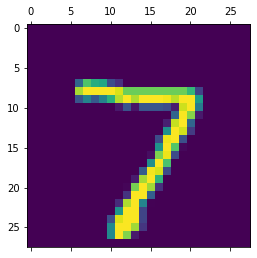

In [55]:
plt.matshow(X_test[0])

In [56]:
# np.argmax return the index of maximum value
np.argmax(y_predicted[0])

7

In [57]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [58]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [59]:
# Creating the confusion matrix using tesnsorflow math moduule
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    5,    4,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   9,    9,  918,   18,   10,    4,   13,   11,   36,    4],
       [   5,    0,   14,  914,    1,   32,    3,   12,   20,    9],
       [   2,    1,    3,    1,  910,    0,   10,    5,    9,   41],
       [  11,    2,    2,   23,   10,  788,   16,    6,   26,    8],
       [  13,    3,    4,    1,    8,   12,  913,    2,    2,    0],
       [   2,    5,   20,    4,    6,    0,    0,  957,    2,   32],
       [  10,    8,    5,   27,    9,   35,    9,   14,  839,   18],
       [  11,    7,    1,    9,   26,    7,    0,   23,    3,  922]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

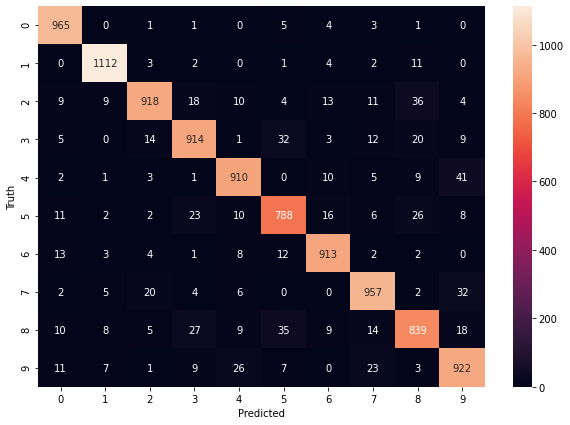

In [60]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
model = keras.Sequential([
    # This model is trained using total 3 layers
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1218 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0853 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0640 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0504 - accuracy: 0.9844


In [62]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9730


[0.08118780702352524, 0.9729999899864197]

Text(69.0, 0.5, 'Truth')

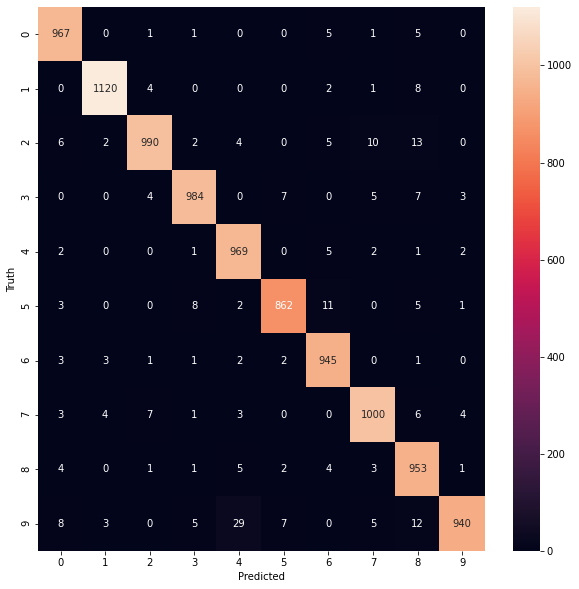

In [65]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
model = keras.Sequential([
    # keras.layer.Flatten is used to reshape the data to 1D data
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9221
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1249 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0886 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0665 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0527 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0418 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0277 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [67]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9771


[0.08614277839660645, 0.9771000146865845]